In [13]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

load_dotenv()

True

In [14]:
llm = ChatOpenAI()

In [15]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [16]:
def generate_joke(state: JokeState):
    prompt = f"generate a joke on the topic {state["topic"]}"
    response = llm.invoke(prompt).content

    return {'joke':response}

In [17]:
def generate_explanation(state:JokeState):
    prompt = f"write an explanation for the joke - {state["joke"]}"
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [18]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation',END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

In [19]:
config1 = {"configurable": {"thread_id":"1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the therapist? Because it felt like it was being too cheesy!',
 'explanation': 'This joke is a play on words, as "cheesy" can mean both something that is corny or lacking in originality, and also containing a lot of cheese. In this case, the pizza is going to therapy because it feels like it is being too cheesy in the sense of being overly sentimental or unoriginal. It\'s a light-hearted and punny way to imagine a pizza seeking help for its cheesy behavior.'}

In [20]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the therapist? Because it felt like it was being too cheesy!', 'explanation': 'This joke is a play on words, as "cheesy" can mean both something that is corny or lacking in originality, and also containing a lot of cheese. In this case, the pizza is going to therapy because it feels like it is being too cheesy in the sense of being overly sentimental or unoriginal. It\'s a light-hearted and punny way to imagine a pizza seeking help for its cheesy behavior.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08594e-365a-623f-8002-2aece3ab72a7'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-08-30T11:31:36.522781+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08594e-2cba-6362-8001-7e59181a9d8f'}}, tasks=(), interrupts=())

In [21]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the therapist? Because it felt like it was being too cheesy!', 'explanation': 'This joke is a play on words, as "cheesy" can mean both something that is corny or lacking in originality, and also containing a lot of cheese. In this case, the pizza is going to therapy because it feels like it is being too cheesy in the sense of being overly sentimental or unoriginal. It\'s a light-hearted and punny way to imagine a pizza seeking help for its cheesy behavior.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08594e-365a-623f-8002-2aece3ab72a7'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-08-30T11:31:36.522781+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08594e-2cba-6362-8001-7e59181a9d8f'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go t

In [22]:
config2 = {"configurable": {"thread_id":"2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the spaghetti break up with the linguine? Because it was tired of all the pasta-drama!',
 'explanation': 'This joke is a play on words and uses pasta terminology to create a humorous scenario. In this joke, the spaghetti breaks up with the linguine because it is tired of all the "pasta-drama," which is a play on the word "pasta" and the word "drama." The joke implies that there is drama or conflict between the spaghetti and the linguine, which is a silly and lighthearted way to explain why they broke up. It is a light-hearted and funny way to bring together food and relationship dynamics in a punny and creative way.'}

In [23]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti break up with the linguine? Because it was tired of all the pasta-drama!', 'explanation': 'This joke is a play on words and uses pasta terminology to create a humorous scenario. In this joke, the spaghetti breaks up with the linguine because it is tired of all the "pasta-drama," which is a play on the word "pasta" and the word "drama." The joke implies that there is drama or conflict between the spaghetti and the linguine, which is a silly and lighthearted way to explain why they broke up. It is a light-hearted and funny way to bring together food and relationship dynamics in a punny and creative way.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f08594e-5a77-66cf-8002-51b5fb79baf6'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-08-30T11:31:40.309647+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_

In [24]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti break up with the linguine? Because it was tired of all the pasta-drama!', 'explanation': 'This joke is a play on words and uses pasta terminology to create a humorous scenario. In this joke, the spaghetti breaks up with the linguine because it is tired of all the "pasta-drama," which is a play on the word "pasta" and the word "drama." The joke implies that there is drama or conflict between the spaghetti and the linguine, which is a silly and lighthearted way to explain why they broke up. It is a light-hearted and funny way to bring together food and relationship dynamics in a punny and creative way.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f08594e-5a77-66cf-8002-51b5fb79baf6'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-08-30T11:31:40.309647+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint

### Benefits of Persistence
- Short term memory
- Fault Tolerance
- Human In the Loop
- Time Travel

#### Short Term Memory
refer last notebook i.e. Chatbot.ipynb

#### Fault Tolerance

In [2]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [3]:
# 1. Define State
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str

In [4]:
# 2. Define Steps
def step_1(state:CrashState) -> CrashState:
    print("Step 1: Executed")
    return {"step1":"done", input: state["input"]}

def step_2(state:CrashState) -> CrashState:
    print("Step 2: hanging.... now mannually interupt from the notebook toolbar (STOP button)")
    time.sleep(30)
    return {"step2":"done"}

def step_3(state:CrashState) -> CrashState:
    print("Step 3: Executed")
    return {"step3":"done"}

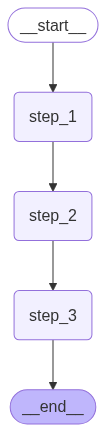

In [5]:
builder = StateGraph(CrashState)

builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.add_edge(START, "step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2","step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()

workflow = builder.compile(checkpointer=checkpointer)
workflow

In [6]:
try:
    print("Running graph: Please manually interrupt during Step 2...")
    workflow.invoke({"input":"start"}, config={"configurable": {"thread_id": "thread-1"}})
except KeyboardInterrupt:
    print("Kernel manually interupted (Creash Simulation)")

Running graph: Please manually interrupt during Step 2...
Step 1: Executed
Step 2: hanging.... now mannually interupt from the notebook toolbar (STOP button)
Kernel manually interupted (Creash Simulation)


In [7]:
workflow.get_state({"configurable": {"thread_id": "thread-1"}})

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f085937-acf1-61a1-8001-ece6ebb0bd30'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-08-30T11:21:31.556279+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f085937-acee-6f1c-8000-0c7499441bc3'}}, tasks=(PregelTask(id='46328f15-b05b-b5c5-8997-781c6956fc9a', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [8]:
list(workflow.get_state_history({"configurable": {"thread_id": "thread-1"}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f085937-acf1-61a1-8001-ece6ebb0bd30'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-08-30T11:21:31.556279+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f085937-acee-6f1c-8000-0c7499441bc3'}}, tasks=(PregelTask(id='46328f15-b05b-b5c5-8997-781c6956fc9a', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f085937-acee-6f1c-8000-0c7499441bc3'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-30T11:21:31.555395+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'ch

In [9]:
final_state = workflow.invoke(None, config={"configurable": {"thread_id": "thread-1"}})
print("\n Final State:", final_state)

Step 2: hanging.... now mannually interupt from the notebook toolbar (STOP button)
Step 3: Executed

 Final State: {'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}


In [10]:
workflow.get_state({"configurable": {"thread_id": "thread-1"}})

StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f08593e-ff2f-6aed-8003-c66d60434e0f'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-08-30T11:24:48.085041+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f08593e-ff2c-63bb-8002-a986b4f4b08d'}}, tasks=(), interrupts=())

In [12]:
list(workflow.get_state_history({"configurable": {"thread_id": "thread-1"}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f08593e-ff2f-6aed-8003-c66d60434e0f'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-08-30T11:24:48.085041+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f08593e-ff2c-63bb-8002-a986b4f4b08d'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f08593e-ff2c-63bb-8002-a986b4f4b08d'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-08-30T11:24:48.083621+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f085937-acf1-61a1-8001-ece6ebb0bd30'}}, tasks=(PregelTask(id='d2e1efa2-ddb4-51cc

#### Time Travel

In [26]:
# take first example of Joke generation. 
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the therapist? Because it felt like it was being too cheesy!', 'explanation': 'This joke is a play on words, as "cheesy" can mean both something that is corny or lacking in originality, and also containing a lot of cheese. In this case, the pizza is going to therapy because it feels like it is being too cheesy in the sense of being overly sentimental or unoriginal. It\'s a light-hearted and punny way to imagine a pizza seeking help for its cheesy behavior.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08594e-365a-623f-8002-2aece3ab72a7'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-08-30T11:31:36.522781+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08594e-2cba-6362-8001-7e59181a9d8f'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go t

In [27]:
workflow.get_state({"configurable": {"thread_id": "1"}})

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the therapist? Because it felt like it was being too cheesy!', 'explanation': 'This joke is a play on words, as "cheesy" can mean both something that is corny or lacking in originality, and also containing a lot of cheese. In this case, the pizza is going to therapy because it feels like it is being too cheesy in the sense of being overly sentimental or unoriginal. It\'s a light-hearted and punny way to imagine a pizza seeking help for its cheesy behavior.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08594e-365a-623f-8002-2aece3ab72a7'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-08-30T11:31:36.522781+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08594e-2cba-6362-8001-7e59181a9d8f'}}, tasks=(), interrupts=())

In [28]:
workflow.get_state({"configurable":{"thread_id":"1", "checkpoint_id":"1f08594e-1e6b-6b70-8000-0876aa530f4e"}})

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f08594e-1e6b-6b70-8000-0876aa530f4e'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-30T11:31:34.013409+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08594e-1e68-642e-bfff-d298643c2ca7'}}, tasks=(PregelTask(id='679da5a2-e468-f630-19f1-32ce5d63cb5b', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the pizza go to the therapist? Because it felt like it was being too cheesy!'}),), interrupts=())

In [29]:
workflow.invoke(None,{"configurable":{"thread_id":"1", "checkpoint_id":"1f08594e-1e6b-6b70-8000-0876aa530f4e"}})

{'topic': 'pizza',
 'joke': 'Why did the cheese go to the party? \nBecause it wanted to get a little slice of the action!',
 'explanation': 'This joke is a play on words using the term "slice" in reference to cheese. The joke implies that the cheese went to the party to partake in the fun (action) and also to potentially be consumed (sliced) by party-goers. It\'s a pun that combines the literal meaning of cheese being sliced with the figurative meaning of wanting to be part of the excitement at a party.'}

In [30]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the cheese go to the party? \nBecause it wanted to get a little slice of the action!', 'explanation': 'This joke is a play on words using the term "slice" in reference to cheese. The joke implies that the cheese went to the party to partake in the fun (action) and also to potentially be consumed (sliced) by party-goers. It\'s a pun that combines the literal meaning of cheese being sliced with the figurative meaning of wanting to be part of the excitement at a party.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f085955-4bab-6d10-8002-554f53764101'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-08-30T11:34:46.663064+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f085955-42b7-6c56-8001-dd03bd455a37'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the cheese go to the

Update the state as Samosa

In [32]:
workflow.update_state({"configurable":{"thread_id":"1","checkpoint_ns":"","checkpoint_id":"1f08594e-1e6b-6b70-8000-0876aa530f4e"}},{"topic":"samosa"})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f08595c-8160-6359-8001-575580eaefea'}}

In [33]:
workflow.invoke(None,{"configurable":{"thread_id":"1", "checkpoint_id":"1f08595c-8160-6359-8001-575580eaefea"}})

{'topic': 'samosa',
 'joke': 'Why did the samosa go to the party? Because it was a real "flaky" character!',
 'explanation': 'This joke is a play on words using the term "flaky." In this context, "flaky" can mean unreliable or inconsistent. However, in the case of a samosa, it is also a reference to the flaky pastry crust that is a common characteristic of this popular Indian snack. So, the joke is suggesting that the samosa went to the party because it is literally a "flaky" character due to its flaky pastry crust.'}

In [34]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa go to the party? Because it was a real "flaky" character!', 'explanation': 'This joke is a play on words using the term "flaky." In this context, "flaky" can mean unreliable or inconsistent. However, in the case of a samosa, it is also a reference to the flaky pastry crust that is a common characteristic of this popular Indian snack. So, the joke is suggesting that the samosa went to the party because it is literally a "flaky" character due to its flaky pastry crust.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08595d-b682-6e3c-8003-77f428f3cd64'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-08-30T11:38:32.614440+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08595d-a620-6f05-8002-47df2fbe1c70'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the sa